<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">A Practical Guide to Reading ACF & PACF Plots</h3>
</div>

**What Are We Actually Looking At?**

**ACF (Autocorrelation Function)**: Shows correlation between the series and its lagged values
- Think of it as: "How much does the value TODAY relate to values YESTERDAY, 2 DAYS AGO, 3 DAYS AGO, etc."

**PACF (Partial Autocorrelation Function)**: Shows the DIRECT correlation at each lag, removing the influence of shorter lags
- Think of it as: "How much does TODAY relate to 3 DAYS AGO, after removing the indirect influence through YESTERDAY and 2 DAYS AGO"


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">The Golden Rules (Memorize These!)</h3>
</div>

| Model Type | ACF Pattern | PACF Pattern | What This Means |
|------------|-------------|--------------|------------------|
| **AR(p)** | Decays gradually (exponential/sinusoidal) | **Cuts off sharply** after lag p | Use **PACF** to find order |
| **MA(q)** | **Cuts off sharply** after lag q | Decays gradually | Use **ACF** to find order |
| **ARMA(p,q)** | Decays gradually | Decays gradually | Both components present |

**Key Insight**: Look for where one plot "cuts off" sharply - that tells you the order!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 4)

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 1: Pure AR(1) Process - "Yesterday Matters"</h3>
</div>

Formula: $y_t = 0.7 \times y_{t-1} + \epsilon_t$

**Real-world analogy**: Stock prices where today's price is influenced by yesterday's price

**What to expect:**
- ACF: Slowly decaying pattern (gradual decline)
- PACF: **ONE significant spike at lag 1, then cuts off** ← This tells us AR(1)!

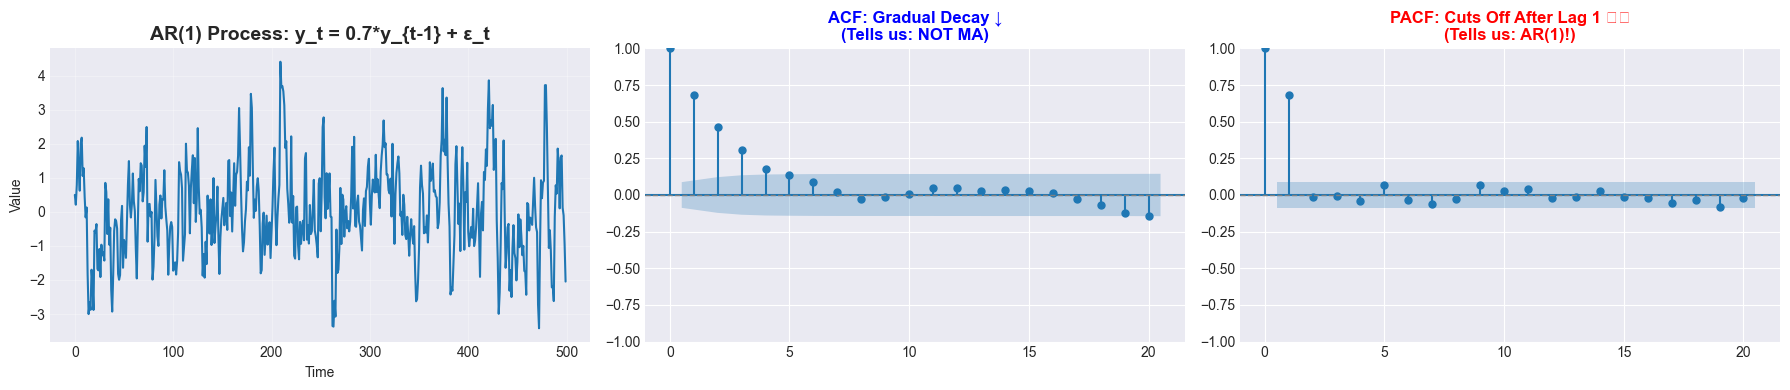


🎯 INTERPRETATION:
   - PACF has ONE significant spike at lag 1 → This is AR(1)
   - ACF decays gradually → Confirms AR structure
   - Decision: Use ARIMA(1, 0, 0) or just AR(1)


In [2]:
# Generate AR(1) process: y_t = 0.7*y_{t-1} + error
ar1_coef = np.array([1, -0.7])  # AR polynomial: 1 - 0.7*L
ma1_coef = np.array([1])  # MA polynomial: just 1 (no MA component)

ar1_process = ArmaProcess(ar1_coef, ma1_coef)
ar1_data = ar1_process.generate_sample(nsample=500)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Time series plot
axes[0].plot(ar1_data)
axes[0].set_title('AR(1) Process: y_t = 0.7*y_{t-1} + ε_t', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# ACF plot
plot_acf(ar1_data, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Gradual Decay ↓\n(Tells us: NOT MA)', fontsize=12, fontweight='bold', color='blue')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

# PACF plot
plot_pacf(ar1_data, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Cuts Off After Lag 1 ✂️\n(Tells us: AR(1)!)', fontsize=12, fontweight='bold', color='red')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION:")
print("   - PACF has ONE significant spike at lag 1 → This is AR(1)")
print("   - ACF decays gradually → Confirms AR structure")
print("   - Decision: Use ARIMA(1, 0, 0) or just AR(1)")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 2: Pure AR(2) Process - "Yesterday AND Two Days Ago Matter"</h3>
</div>

Formula: $y_t = 0.5 \times y_{t-1} + 0.3 \times y_{t-2} + \epsilon_t$

**Real-world analogy**: Temperature where today is influenced by the past 2 days

**What to expect:**
- ACF: Slowly decaying (might show damped sine wave)
- PACF: **TWO significant spikes at lags 1 & 2, then cuts off** ← This tells us AR(2)!

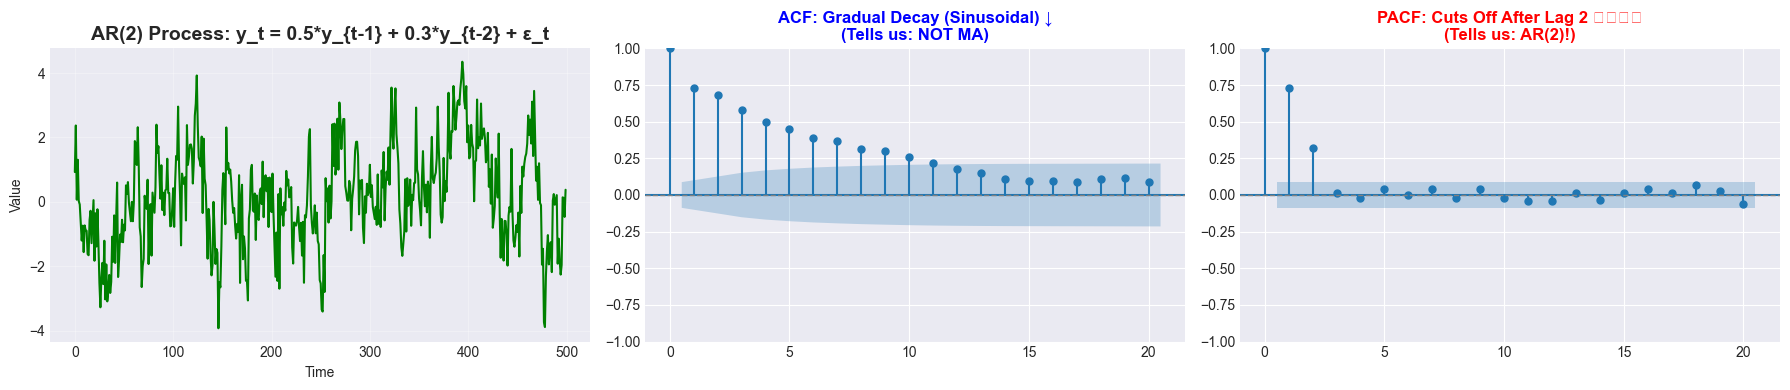


🎯 INTERPRETATION:
   - PACF has TWO significant spikes at lags 1 & 2 → This is AR(2)
   - ACF shows sinusoidal decay → Confirms AR structure
   - Decision: Use ARIMA(2, 0, 0) or just AR(2)


In [3]:
# Generate AR(2) process: y_t = 0.5*y_{t-1} + 0.3*y_{t-2} + error
ar2_coef = np.array([1, -0.5, -0.3])  # AR polynomial
ma2_coef = np.array([1])  # No MA component

ar2_process = ArmaProcess(ar2_coef, ma2_coef)
ar2_data = ar2_process.generate_sample(nsample=500)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ar2_data, color='green')
axes[0].set_title('AR(2) Process: y_t = 0.5*y_{t-1} + 0.3*y_{t-2} + ε_t', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(ar2_data, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Gradual Decay (Sinusoidal) ↓\n(Tells us: NOT MA)', fontsize=12, fontweight='bold', color='blue')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(ar2_data, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Cuts Off After Lag 2 ✂️✂️\n(Tells us: AR(2)!)', fontsize=12, fontweight='bold', color='red')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION:")
print("   - PACF has TWO significant spikes at lags 1 & 2 → This is AR(2)")
print("   - ACF shows sinusoidal decay → Confirms AR structure")
print("   - Decision: Use ARIMA(2, 0, 0) or just AR(2)")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 3: Pure MA(1) Process - "Yesterday's Shock Matters"</h3>
</div>

Formula: $y_t = \epsilon_t + 0.7 \times \epsilon_{t-1}$

**Real-world analogy**: News impact where today is affected by yesterday's surprise events

**What to expect:**
- ACF: **ONE significant spike at lag 1, then cuts off** ← This tells us MA(1)!
- PACF: Slowly decaying pattern

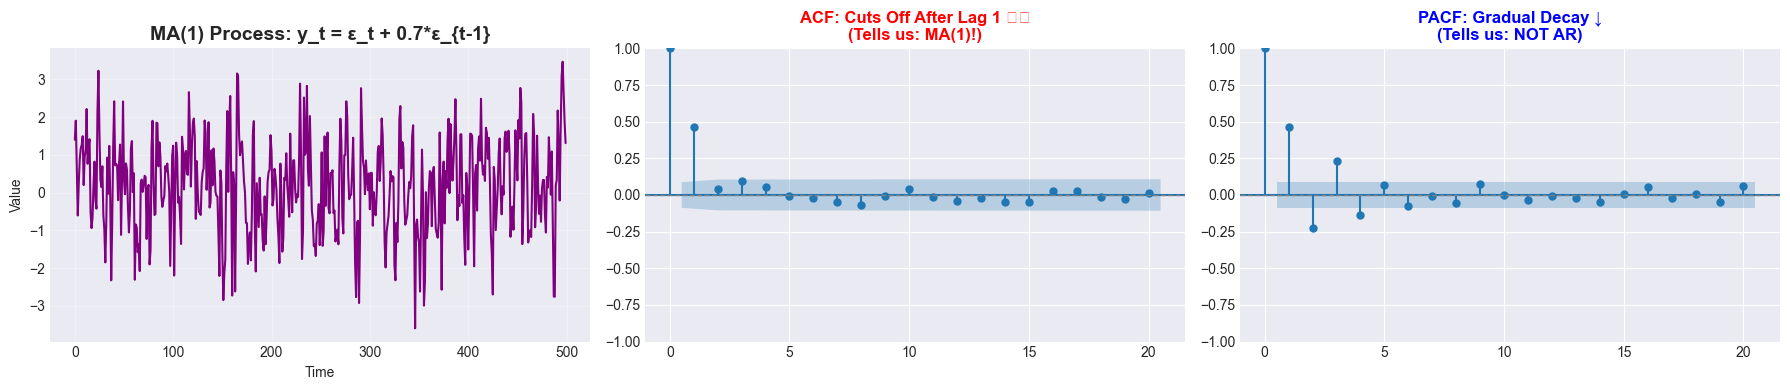


🎯 INTERPRETATION:
   - ACF has ONE significant spike at lag 1 → This is MA(1)
   - PACF decays gradually → Confirms MA structure
   - Decision: Use ARIMA(0, 0, 1) or just MA(1)

💡 KEY: MA is the OPPOSITE of AR - now the ACF cuts off instead of PACF!


In [4]:
# Generate MA(1) process: y_t = error_t + 0.7*error_{t-1}
ma1_ar_coef = np.array([1])  # No AR component
ma1_ma_coef = np.array([1, 0.7])  # MA polynomial

ma1_process = ArmaProcess(ma1_ar_coef, ma1_ma_coef)
ma1_data = ma1_process.generate_sample(nsample=500)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ma1_data, color='purple')
axes[0].set_title('MA(1) Process: y_t = ε_t + 0.7*ε_{t-1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(ma1_data, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Cuts Off After Lag 1 ✂️\n(Tells us: MA(1)!)', fontsize=12, fontweight='bold', color='red')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(ma1_data, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Gradual Decay ↓\n(Tells us: NOT AR)', fontsize=12, fontweight='bold', color='blue')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION:")
print("   - ACF has ONE significant spike at lag 1 → This is MA(1)")
print("   - PACF decays gradually → Confirms MA structure")
print("   - Decision: Use ARIMA(0, 0, 1) or just MA(1)")
print("\n💡 KEY: MA is the OPPOSITE of AR - now the ACF cuts off instead of PACF!")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 4: Pure MA(2) Process - "Past Two Shocks Matter"</h3>
</div>

Formula: $y_t = \epsilon_t + 0.5 \times \epsilon_{t-1} + 0.3 \times \epsilon_{t-2}$

**What to expect:**
- ACF: **TWO significant spikes at lags 1 & 2, then cuts off** ← This tells us MA(2)!
- PACF: Slowly decaying

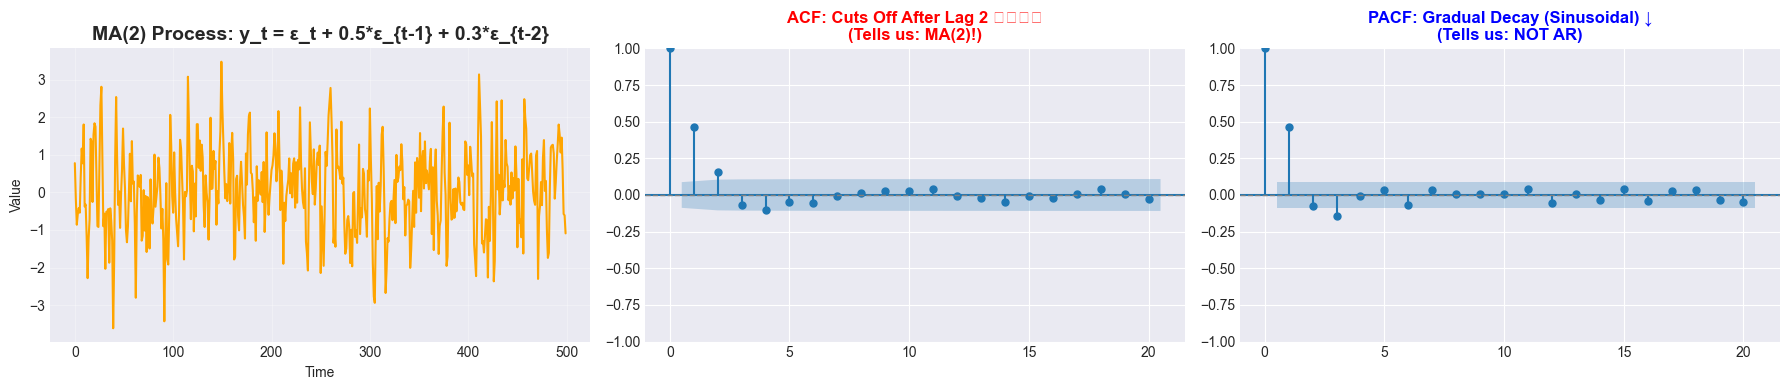


🎯 INTERPRETATION:
   - ACF has TWO significant spikes at lags 1 & 2 → This is MA(2)
   - PACF decays in sinusoidal pattern → Confirms MA structure
   - Decision: Use ARIMA(0, 0, 2) or just MA(2)


In [5]:
# Generate MA(2) process
ma2_ar_coef = np.array([1])  # No AR component
ma2_ma_coef = np.array([1, 0.5, 0.3])  # MA polynomial

ma2_process = ArmaProcess(ma2_ar_coef, ma2_ma_coef)
ma2_data = ma2_process.generate_sample(nsample=500)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ma2_data, color='orange')
axes[0].set_title('MA(2) Process: y_t = ε_t + 0.5*ε_{t-1} + 0.3*ε_{t-2}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(ma2_data, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Cuts Off After Lag 2 ✂️✂️\n(Tells us: MA(2)!)', fontsize=12, fontweight='bold', color='red')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(ma2_data, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Gradual Decay (Sinusoidal) ↓\n(Tells us: NOT AR)', fontsize=12, fontweight='bold', color='blue')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION:")
print("   - ACF has TWO significant spikes at lags 1 & 2 → This is MA(2)")
print("   - PACF decays in sinusoidal pattern → Confirms MA structure")
print("   - Decision: Use ARIMA(0, 0, 2) or just MA(2)")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 5: ARMA(1,1) Process - "Both Past Values AND Shocks Matter"</h3>
</div>

Formula: $y_t = 0.6 \times y_{t-1} + \epsilon_t + 0.5 \times \epsilon_{t-1}$

**Real-world analogy**: Economic indicators influenced by both previous values AND recent surprises

**What to expect:**
- ACF: Decays gradually (NOT cutting off sharply)
- PACF: Decays gradually (NOT cutting off sharply)
- **Both decay = Both AR and MA components present!**

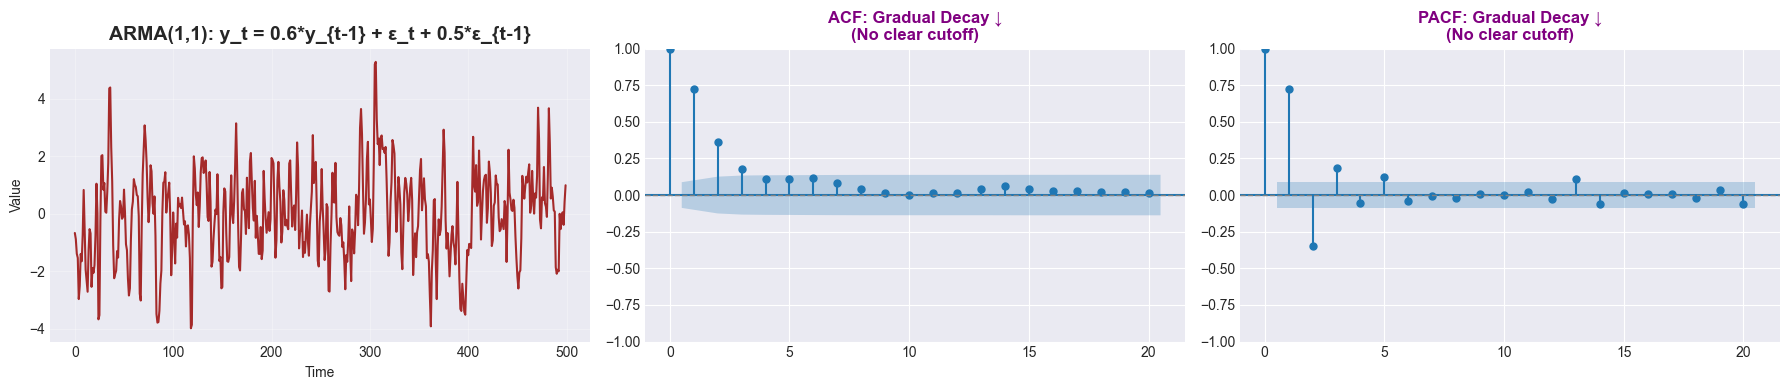


🎯 INTERPRETATION:
   - BOTH ACF and PACF decay gradually → This is ARMA
   - Neither cuts off sharply → Mixed model needed
   - Decision: Use ARIMA(1, 0, 1) or ARMA(1,1)

💡 When BOTH decay: You need BOTH AR and MA terms!


In [6]:
# Generate ARMA(1,1) process
arma_ar_coef = np.array([1, -0.6])  # AR part
arma_ma_coef = np.array([1, 0.5])   # MA part

arma_process = ArmaProcess(arma_ar_coef, arma_ma_coef)
arma_data = arma_process.generate_sample(nsample=500)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(arma_data, color='brown')
axes[0].set_title('ARMA(1,1): y_t = 0.6*y_{t-1} + ε_t + 0.5*ε_{t-1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(arma_data, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Gradual Decay ↓\n(No clear cutoff)', fontsize=12, fontweight='bold', color='purple')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(arma_data, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Gradual Decay ↓\n(No clear cutoff)', fontsize=12, fontweight='bold', color='purple')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION:")
print("   - BOTH ACF and PACF decay gradually → This is ARMA")
print("   - Neither cuts off sharply → Mixed model needed")
print("   - Decision: Use ARIMA(1, 0, 1) or ARMA(1,1)")
print("\n💡 When BOTH decay: You need BOTH AR and MA terms!")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 6: Non-Stationary Data (Random Walk) - "The Data Has a Memory Problem"</h3>
</div>

Formula: $y_t = y_{t-1} + \epsilon_t$ (coefficient = 1.0, not <1)

**Real-world analogy**: Stock prices that drift up or down without reverting to a mean

**What to expect:**
- ACF: Very slow decay OR stays significant for many lags
- **This means: NOT STATIONARY - need differencing (the 'd' in ARIMA)!**

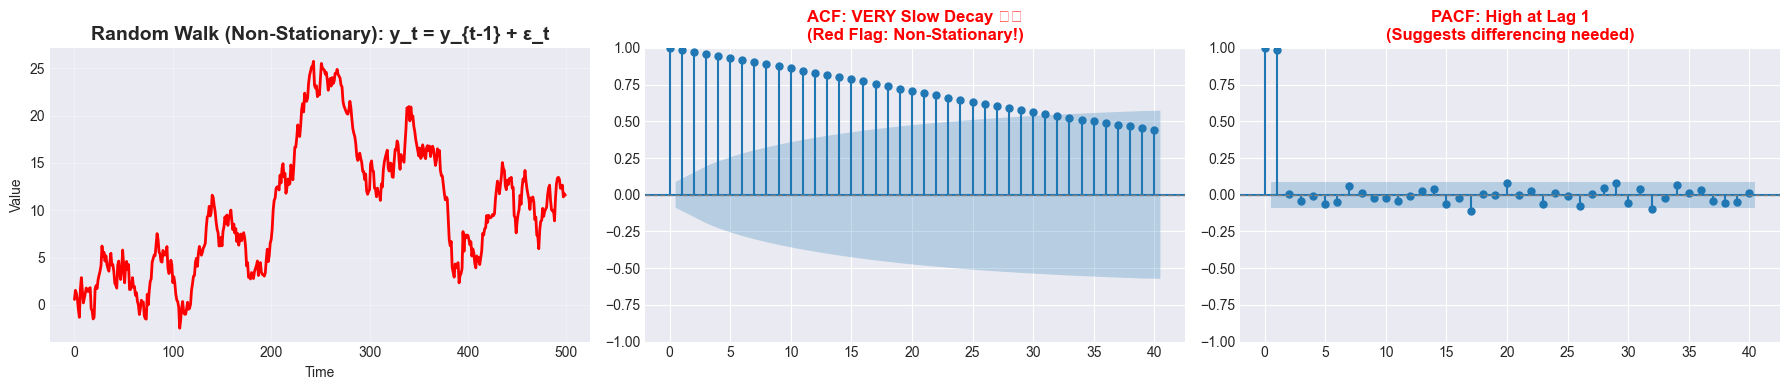


⚠️ WARNING: NON-STATIONARY DATA DETECTED!
   - ACF decays VERY slowly (stays high for many lags)
   - PACF has very high spike at lag 1 (close to 1.0)
   - Decision: Apply differencing (use d=1 in ARIMA)

🔧 Fix: difference the data first, then check ACF/PACF again


In [7]:
# Generate random walk (non-stationary)
rw_data = np.cumsum(np.random.randn(500))  # Cumulative sum = random walk

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(rw_data, color='red', linewidth=2)
axes[0].set_title('Random Walk (Non-Stationary): y_t = y_{t-1} + ε_t', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(rw_data, lags=40, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: VERY Slow Decay ⚠️\n(Red Flag: Non-Stationary!)', fontsize=12, fontweight='bold', color='red')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(rw_data, lags=40, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: High at Lag 1\n(Suggests differencing needed)', fontsize=12, fontweight='bold', color='red')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n⚠️ WARNING: NON-STATIONARY DATA DETECTED!")
print("   - ACF decays VERY slowly (stays high for many lags)")
print("   - PACF has very high spike at lag 1 (close to 1.0)")
print("   - Decision: Apply differencing (use d=1 in ARIMA)")
print("\n🔧 Fix: difference the data first, then check ACF/PACF again")

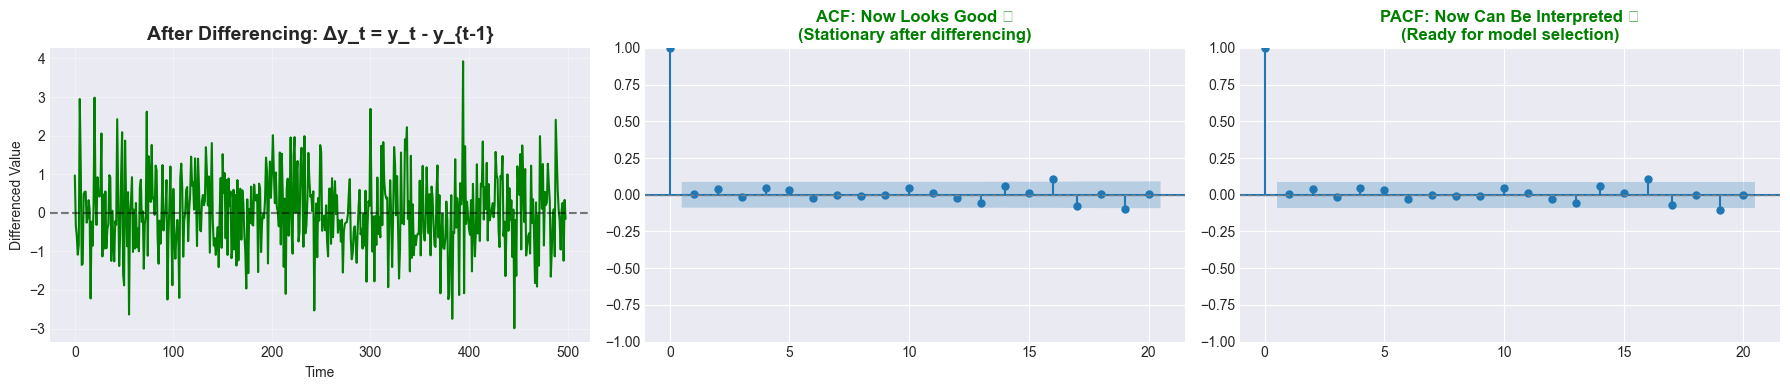


✅ AFTER DIFFERENCING:
   - ACF now decays properly → Data is stationary
   - Can now use ACF/PACF to choose p and q
   - The 'd' in ARIMA(p,d,q) would be d=1


In [8]:
# After differencing
rw_diff = np.diff(rw_data)

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(rw_diff, color='green', linewidth=1.5)
axes[0].set_title('After Differencing: Δy_t = y_t - y_{t-1}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Differenced Value')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, linestyle='--', color='black', alpha=0.5)

plot_acf(rw_diff, lags=20, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Now Looks Good ✓\n(Stationary after differencing)', fontsize=12, fontweight='bold', color='green')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(rw_diff, lags=20, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Now Can Be Interpreted ✓\n(Ready for model selection)', fontsize=12, fontweight='bold', color='green')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n✅ AFTER DIFFERENCING:")
print("   - ACF now decays properly → Data is stationary")
print("   - Can now use ACF/PACF to choose p and q")
print("   - The 'd' in ARIMA(p,d,q) would be d=1")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 7: Seasonal Pattern - "What About Monthly or Weekly Patterns?"</h3>
</div>

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Seasonal ARIMA (SARIMA)</h3>
</div>

**Real-world analogy**: Retail sales with yearly patterns (Christmas shopping, summer sales)

**What to expect:**
- ACF: Significant spikes at seasonal lags (12, 24, 36 for monthly data)
- PACF: Significant spikes at seasonal lags
- **This means: Need seasonal components (SARIMA)!**

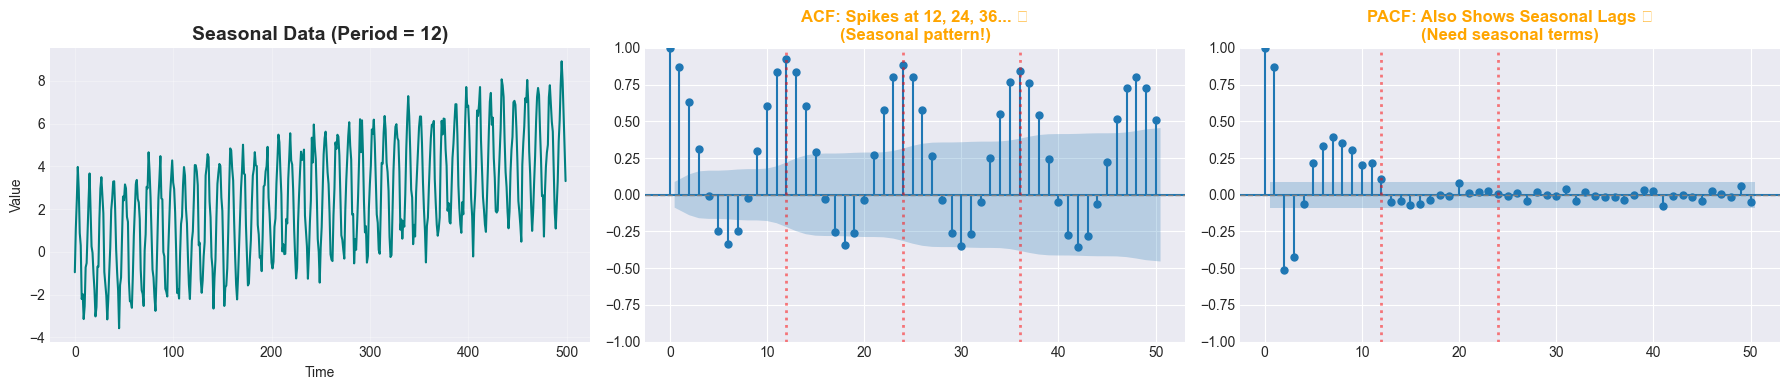


🎯 INTERPRETATION FOR SEASONAL DATA:
   - ACF shows spikes at multiples of 12 → Seasonal period = 12
   - PACF also shows seasonal pattern
   - Decision: Use SARIMA(p,d,q)(P,D,Q,s) where s=12

📝 SARIMA notation explained:
   - (p,d,q): Regular ARIMA components (short-term)
   - (P,D,Q,s): Seasonal components at period s
   - Example: SARIMA(1,1,1)(1,1,1,12) for monthly data


In [9]:
# Generate data with seasonal pattern (period = 12)
t = np.arange(500)
seasonal_component = 3 * np.sin(2 * np.pi * t / 12)  # Seasonal period = 12
trend = 0.01 * t
noise = np.random.randn(500) * 0.5
seasonal_data = trend + seasonal_component + noise

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(seasonal_data, color='teal', linewidth=1.5)
axes[0].set_title('Seasonal Data (Period = 12)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

plot_acf(seasonal_data, lags=50, ax=axes[1], alpha=0.05)
axes[1].set_title('ACF: Spikes at 12, 24, 36... 🔄\n(Seasonal pattern!)', fontsize=12, fontweight='bold', color='orange')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)
axes[1].axvline(x=12, linestyle=':', color='red', alpha=0.5, linewidth=2)
axes[1].axvline(x=24, linestyle=':', color='red', alpha=0.5, linewidth=2)
axes[1].axvline(x=36, linestyle=':', color='red', alpha=0.5, linewidth=2)

plot_pacf(seasonal_data, lags=50, ax=axes[2], alpha=0.05, method='ywm')
axes[2].set_title('PACF: Also Shows Seasonal Lags 🔄\n(Need seasonal terms)', fontsize=12, fontweight='bold', color='orange')
axes[2].axhline(y=0, linestyle='--', color='gray', linewidth=1)
axes[2].axvline(x=12, linestyle=':', color='red', alpha=0.5, linewidth=2)
axes[2].axvline(x=24, linestyle=':', color='red', alpha=0.5, linewidth=2)

plt.tight_layout()
plt.show()

print("\n🎯 INTERPRETATION FOR SEASONAL DATA:")
print("   - ACF shows spikes at multiples of 12 → Seasonal period = 12")
print("   - PACF also shows seasonal pattern")
print("   - Decision: Use SARIMA(p,d,q)(P,D,Q,s) where s=12")
print("\n📝 SARIMA notation explained:")
print("   - (p,d,q): Regular ARIMA components (short-term)")
print("   - (P,D,Q,s): Seasonal components at period s")
print("   - Example: SARIMA(1,1,1)(1,1,1,12) for monthly data")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Case 8: Real Data Example - Applying What We Learned</h3>
</div>

Let's create a realistic scenario and walk through the interpretation step-by-step.

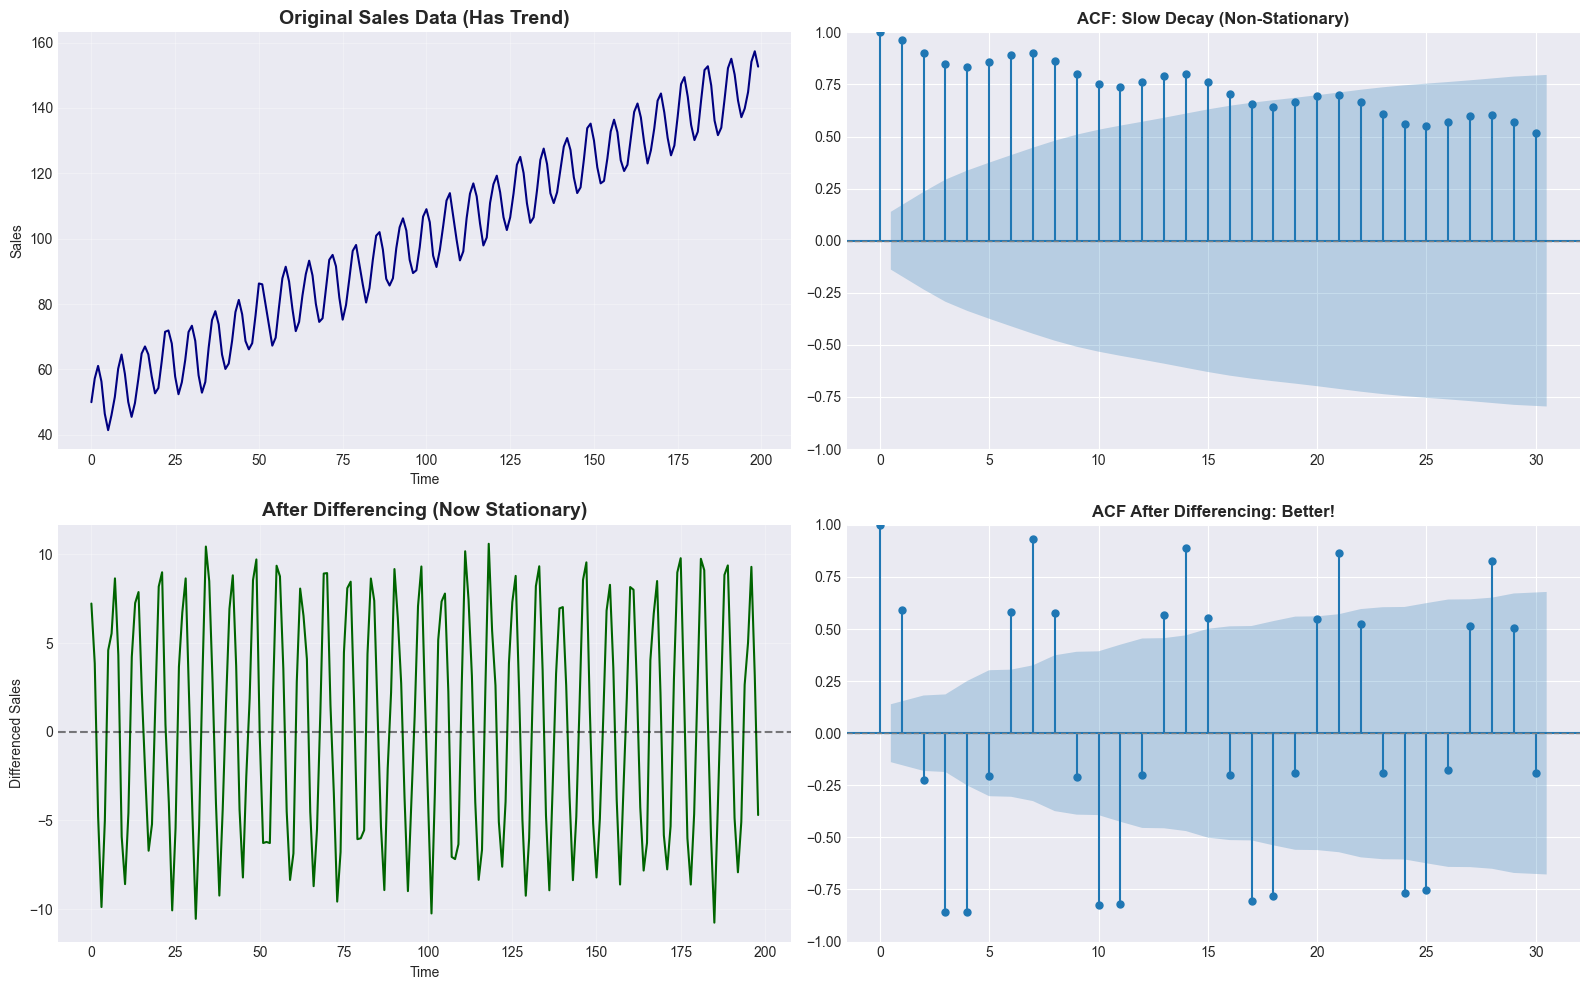

In [10]:
# Simulate a realistic sales dataset with trend and slight seasonality
np.random.seed(123)
t = np.arange(200)

# Components
trend = 50 + 0.5 * t  # Upward trend
seasonal = 10 * np.sin(2 * np.pi * t / 7)  # Weekly seasonality
ar_component = np.zeros(200)
for i in range(1, 200):
    ar_component[i] = 0.6 * ar_component[i-1] + np.random.randn()

sales_data = trend + seasonal + ar_component

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original series
axes[0, 0].plot(sales_data, color='navy', linewidth=1.5)
axes[0, 0].set_title('Original Sales Data (Has Trend)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].grid(True, alpha=0.3)

# ACF of original
plot_acf(sales_data, lags=30, ax=axes[0, 1], alpha=0.05)
axes[0, 1].set_title('ACF: Slow Decay (Non-Stationary)', fontsize=12, fontweight='bold')
axes[0, 1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

# Differenced series
sales_diff = np.diff(sales_data)
axes[1, 0].plot(sales_diff, color='darkgreen', linewidth=1.5)
axes[1, 0].set_title('After Differencing (Now Stationary)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Differenced Sales')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, linestyle='--', color='black', alpha=0.5)

# ACF of differenced
plot_acf(sales_diff, lags=30, ax=axes[1, 1], alpha=0.05)
axes[1, 1].set_title('ACF After Differencing: Better!', fontsize=12, fontweight='bold')
axes[1, 1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

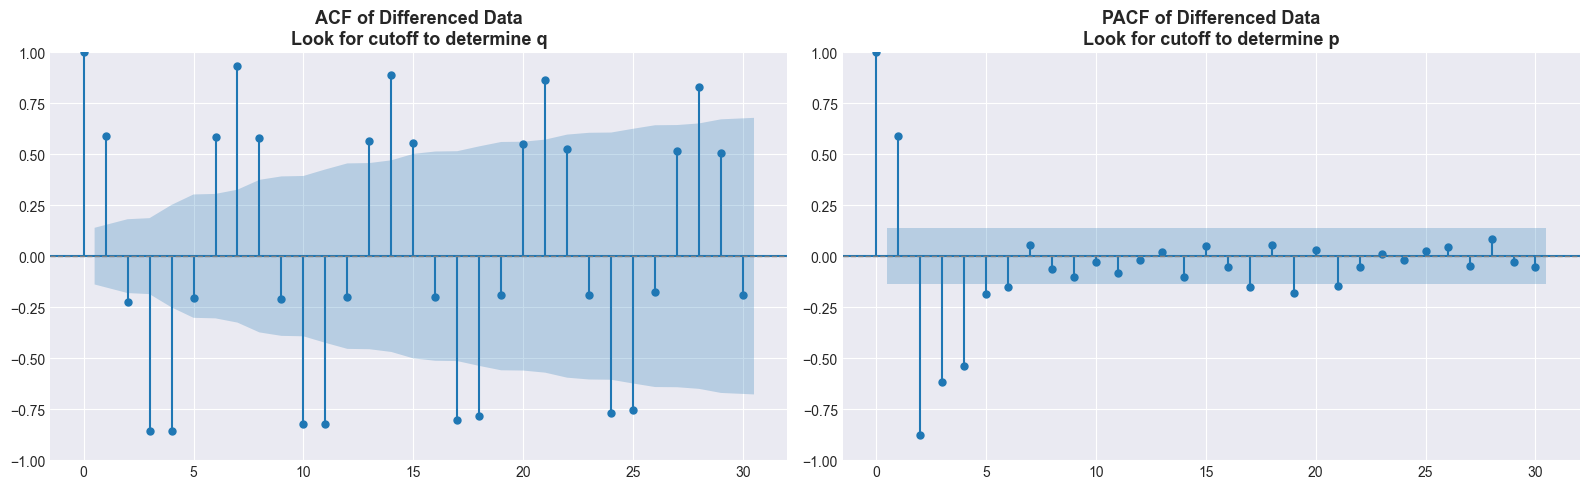


📊 STEP-BY-STEP INTERPRETATION:

1️⃣ Original data showed slow ACF decay → Non-stationary
   → We applied differencing (d=1)

2️⃣ After differencing, look at PACF:
   - If PACF cuts off after lag p → Use AR(p)
   - In this case, PACF shows decay → suggests AR component

3️⃣ Look at ACF:
   - If ACF cuts off after lag q → Use MA(q)
   - ACF pattern suggests checking q=1 or q=2

4️⃣ Final model suggestion: Try ARIMA(1,1,1) or ARIMA(2,1,1)
   Then compare AIC/BIC values to choose best model!


In [11]:
# Now check ACF and PACF of the differenced data to choose p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

plot_acf(sales_diff, lags=30, ax=axes[0], alpha=0.05)
axes[0].set_title('ACF of Differenced Data\nLook for cutoff to determine q', fontsize=13, fontweight='bold')
axes[0].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plot_pacf(sales_diff, lags=30, ax=axes[1], alpha=0.05, method='ywm')
axes[1].set_title('PACF of Differenced Data\nLook for cutoff to determine p', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, linestyle='--', color='gray', linewidth=1)

plt.tight_layout()
plt.show()

print("\n📊 STEP-BY-STEP INTERPRETATION:")
print("\n1️⃣ Original data showed slow ACF decay → Non-stationary")
print("   → We applied differencing (d=1)\n")

print("2️⃣ After differencing, look at PACF:")
print("   - If PACF cuts off after lag p → Use AR(p)")
print("   - In this case, PACF shows decay → suggests AR component\n")

print("3️⃣ Look at ACF:")
print("   - If ACF cuts off after lag q → Use MA(q)")
print("   - ACF pattern suggests checking q=1 or q=2\n")

print("4️⃣ Final model suggestion: Try ARIMA(1,1,1) or ARIMA(2,1,1)")
print("   Then compare AIC/BIC values to choose best model!")

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Summary Cheat Sheet: Your ACF/PACF Quick Reference</h3>
</div>

<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">The Decision Tree</h3>
</div>

```
START HERE
    |
    ↓
Is ACF decaying VERY slowly?
    ├─ YES → Data is NON-STATIONARY
    |         ├─ Apply differencing (d=1 or d=2)
    |         └─ Re-check ACF/PACF
    |
    ├─ NO → Data is STATIONARY, proceed...
           |
           ↓
       Do you see spikes at regular intervals (12, 24, 36...)?
           ├─ YES → SEASONAL PATTERN
           |         └─ Use SARIMA(p,d,q)(P,D,Q,s)
           |
           ├─ NO → Look at ACF & PACF patterns:
                  |
                  ├─ PACF cuts off, ACF decays → AR(p)
                  |   └─ Order p = number of significant PACF spikes
                  |
                  ├─ ACF cuts off, PACF decays → MA(q)
                  |   └─ Order q = number of significant ACF spikes
                  |
                  └─ Both decay gradually → ARMA(p,q)
                      └─ Use information criteria (AIC/BIC) to find p,q
```


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Quick Reference Table</h3>
</div>

| If You See This... | Then Do This... |
|--------------------|-----------------|
| ACF decays very slowly (>20 lags) | Non-stationary! Difference the data (d=1) |
| PACF cuts off at lag p, ACF decays | Use AR(p) or ARIMA(p,0,0) |
| ACF cuts off at lag q, PACF decays | Use MA(q) or ARIMA(0,0,q) |
| Both ACF and PACF decay | Use ARMA(p,q) - try different combinations |
| Spikes at lags 12, 24, 36... | Seasonal! Use SARIMA with s=12 |
| Unsure between models | Fit multiple models, compare AIC/BIC |


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Pro Tips</h3>
</div>

1. **Always check stationarity first** - If ACF decays slowly, difference before interpreting patterns

2. **"Cuts off" means** - Goes to zero and STAYS in the confidence bands (usually after 1-3 lags)

3. **"Decays" means** - Gradually decreases over many lags (could be exponential or sinusoidal)

4. **When in doubt** - Fit multiple models and use AIC/BIC to choose

5. **Seasonal data** - Look for patterns at multiples of the season (12, 24, 36 for monthly)

6. **Real data is messy** - Patterns won't be as clean as textbook examples, use judgment!


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Common Mistakes to Avoid</h3>
</div>

❌ Trying to interpret ACF/PACF on non-stationary data
❌ Thinking "decay" means any downward trend (it should be gradual over many lags)
❌ Ignoring the confidence bands (blue shaded area)
❌ Looking only at ACF or only at PACF (you need BOTH!)
❌ Forgetting to check for seasonality in monthly/quarterly data


<div style="
    background-color:#8F0177;
    padding:15px;
    border-radius:8px;
    color:white;
    display:flex;
    align-items:center;
">
    <h3 style="margin:0;">Remember</h3>
</div>

The goal is NOT to find the "perfect" pattern match. Real data is noisy. 

Use ACF/PACF to get **reasonable starting models**, then:
1. Fit multiple candidate models
2. Compare AIC/BIC scores
3. Check residuals (they should look like white noise)
4. Validate on holdout data

**You're not failing if patterns aren't crystal clear - that's normal!**